<a href="https://colab.research.google.com/github/arockiasachin/ContextualFinAi/blob/main/Weaviate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
%pip install -Uq "unstructured[all-docs]" pillow lxml pillow
%pip install -Uq chromadb tiktoken
%pip install -Uq langchain langchain-community langchain-openai langchain-groq
%pip install -Uq python_dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 33.2 MB/s e

In [ ]:
pip install unstructured-ingest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.7/564.7 kB 8.8 MB/s eta 0:00:00


In [ ]:
!pip install weaviate-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.4/325.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 31.8 MB/s eta 0:00:00


In [ ]:
import os

# keys for the services we will use

os.environ["OPENAI_API_KEY"] = "API KEY HERE"
os.environ["GROQ_API_KEY"] = "API KEY HERE"
#os.environ["LANGCHAIN_API_KEY"] = "API KEY HERE"
#os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["UNSTRUCTURED_API_KEY"] = "API KEY HERE"
os.environ["UNSTRUCTURED_API_URL"] = "https://api.unstructuredapp.io/general/v0/general"
os.environ["LOCAL_FILE_INPUT_DIR"] = "/content/drive/MyDrive/Unstructured/input"
os.environ["LOCAL_FILE_OUTPUT_DIR"] = "/content/drive/MyDrive/Unstructured/outputv2"

In [ ]:
import os

os.environ['WEAVIATE_API_KEY'] = "API KEY HERE"
os.environ['WEAVIATE_CLUSTER_URL'] = "https://ccowuziasxa4vn7jahgg.c0.asia-southeast1.gcp.weaviate.cloud"
os.environ['OPENAI_APIKEY'] = "API KEY HERE"

In [ ]:
os.environ['LOCAL_FILE_INPUT_DIR'] = "/content/input"
os.environ['LOCAL_FILE_INPUT_DIR'] = "output"

In [ ]:
os.environ['WEAVIATE_COLLECTION'] = 'Amazon'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Local Unstructured Pipeline

In [ ]:
import os
from unstructured_ingest.v2.pipeline.pipeline import Pipeline
from unstructured_ingest.v2.interfaces import ProcessorConfig
from unstructured_ingest.v2.processes.connectors.local import (
    LocalIndexerConfig,
    LocalDownloaderConfig,
    LocalConnectionConfig,
    LocalUploaderConfig
)
from unstructured_ingest.v2.processes.partitioner import PartitionerConfig
from unstructured_ingest.v2.processes.chunker import ChunkerConfig
from unstructured_ingest.v2.processes.embedder import EmbedderConfig

# Chunking and embedding are optional.

if __name__ == "__main__":
    Pipeline.from_configs(
        context=ProcessorConfig(),
        indexer_config=LocalIndexerConfig(input_path="/content/input"),
        downloader_config=LocalDownloaderConfig(),
        source_connection_config=LocalConnectionConfig(),
        partitioner_config=PartitionerConfig(
            partition_by_api=True,
            api_key=os.getenv("UNSTRUCTURED_API_KEY"),
            partition_endpoint=os.getenv("UNSTRUCTURED_API_URL"),
            strategy="hi_res",
            additional_partition_args={
                "split_pdf_page": True,
                "split_pdf_allow_failed": True,
                "split_pdf_concurrency_level": 15,
                "extract_image_block_types": ["Image", "Table"]
            }
        ),
        chunker_config=ChunkerConfig(
        chunking_strategy="by_title",
        chunk_max_characters=2000,
        chunk_new_after_n_chars=1500,
        chunk_combine_text_under_n_chars=400,
        chunk_multipage_sections=True,
        chunk_overlap=100,
        chunk_include_orig_elements=False,  # Use this instead of include_orig_elements
        chunk_by_api=True,  # Enable API-based chunking
        chunk_api_key=os.getenv("UNSTRUCTURED_API_KEY"),
        chunking_endpoint=os.getenv("UNSTRUCTURED_API_URL")
    ),
        uploader_config=LocalUploaderConfig(output_dir="/content/output")
    ).run()

Overriding of current TracerProvider is not allowed
2024-12-18 18:10:11,411 MainProcess INFO     created index with configs: {"input_path": "/content/input", "recursive": false}, connection configs: {"access_config": "**********"}
2024-12-18 18:10:11,414 MainProcess INFO     Created download with configs: {"download_dir": null}, connection configs: {"access_config": "**********"}
2024-12-18 18:10:11,417 MainProcess INFO     created partition with configs: {"strategy": "hi_res", "ocr_languages": null, "encoding": null, "additional_partition_args": {"split_pdf_page": true, "split_pdf_allow_failed": true, "split_pdf_concurrency_level": 15, "extract_image_block_types": ["Image", "Table"]}, "skip_infer_table_types": null, "fields_include": ["element_id", "text", "type", "metadata", "embeddings"], "flatten_metadata": false, "metadata_exclude": [], "element_exclude": [], "metadata_include": [], "partition_endpoint": "https://api.unstructuredapp.io/general/v0/general", "partition_by_api": true

In [ ]:
Pipeline.from_configs(
    context=ProcessorConfig(),
    indexer_config=LocalIndexerConfig(input_path="/content/input"),
    downloader_config=LocalDownloaderConfig(),
    source_connection_config=LocalConnectionConfig(),
    partitioner_config=PartitionerConfig(
        partition_by_api=True,
        api_key=os.getenv("UNSTRUCTURED_API_KEY"),
        partition_endpoint=os.getenv("UNSTRUCTURED_API_URL"),
        strategy="hi_res",
        additional_partition_args={
            "split_pdf_page": True,
            "split_pdf_allow_failed": True,
            "split_pdf_concurrency_level": 15,
            "extract_image_block_types": ["Image", "Table"]
        }
    ),
    chunker_config=ChunkerConfig(
        chunking_strategy="by_title",
        chunk_max_characters=2000,
        chunk_new_after_n_chars=1500,
        chunk_combine_text_under_n_chars=400,
        chunk_multipage_sections=True,
        chunk_overlap=100,
        chunk_include_orig_elements=False,
        chunk_by_api=False  # Disable API-based chunking to use local chunking
    ),
    uploader_config=LocalUploaderConfig(output_dir="/content/drive/MyDrive/Final52RAG")
).run()

Overriding of current TracerProvider is not allowed
2024-12-18 18:16:52,593 MainProcess INFO     created index with configs: {"input_path": "/content/input", "recursive": false}, connection configs: {"access_config": "**********"}
2024-12-18 18:16:52,598 MainProcess INFO     Created download with configs: {"download_dir": null}, connection configs: {"access_config": "**********"}
2024-12-18 18:16:52,604 MainProcess INFO     created partition with configs: {"strategy": "hi_res", "ocr_languages": null, "encoding": null, "additional_partition_args": {"split_pdf_page": true, "split_pdf_allow_failed": true, "split_pdf_concurrency_level": 15, "extract_image_block_types": ["Image", "Table"]}, "skip_infer_table_types": null, "fields_include": ["element_id", "text", "type", "metadata", "embeddings"], "flatten_metadata": false, "metadata_exclude": [], "element_exclude": [], "metadata_include": [], "partition_endpoint": "https://api.unstructuredapp.io/general/v0/general", "partition_by_api": true

In [ ]:
from unstructured_ingest.v2.processes.chunker import ChunkerConfig
ChunkerConfig??

In [ ]:
import json
import os
from unstructured.staging.base import elements_from_json

def load_processed_files(directory_path):
    elements = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            file_path = os.path.join(directory_path, filename)
            try:
                elements.extend(elements_from_json(filename=file_path))
            except IOError:
                print(f"Error: Could not read file {filename}.")
    return elements

def clean_metadata(metadata):
    """Clean metadata to ensure all values are of type str, int, float, or bool."""
    cleaned = {}
    for key, value in metadata.items():
        if isinstance(value, (str, int, float, bool)):
            cleaned[key] = value
        elif isinstance(value, list) and value:  # Handle lists by converting to the first element as str
            cleaned[key] = str(value[0])
        else:
            cleaned[key] = str(value)  # Convert unsupported types to string
    return cleaned

# Load elements from JSON files
directory_with_results = "/content/drive/MyDrive/Unstructured/test"
elements = load_processed_files(directory_with_results)

In [ ]:
import os
import json

# Specify the folder path containing your JSON files
folder_path = "/content/drive/MyDrive/Unstructured/FInal"

# Initialize an empty list to store all JSON data
all_json_data = []

# Iterate over all files in the specified folder
for file_name in os.listdir(folder_path):
    # Check if the file is a JSON file
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        # Open and load the JSON file
        with open(file_path, 'r') as file:
            try:
                json_data = json.load(file)
                all_json_data.append(json_data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in file {file_name}: {e}")

# Print the combined JSON data
print(len(all_json_data))

18


In [ ]:
def print_json_structure(data, indent=0):
    padding = ' ' * indent
    if isinstance(data, dict):
        for key, value in data.items():
            print(f"{padding}{key}: {type(value).__name__}")
            print_json_structure(value, indent + 4)
    elif isinstance(data, list):
        print(f"{padding}List of {len(data)} items")
        for item in data[:1]:  # Print structure of the first item only for simplicity
            print_json_structure(item, indent + 4)

print(type(chunks))
print_json_structure(chunks)


<class 'list'>
List of 113 items
    type: str
    element_id: str
    text: str
    metadata: dict
        filetype: str
        languages: list
            List of 1 items
        page_number: int
        filename: str
        data_source: dict
            url: NoneType
            version: NoneType
            record_locator: dict
                path: str
            date_created: NoneType
            date_modified: str
            date_processed: str
            permissions_data: list
                List of 1 items
                    mode: int
            filesize_bytes: int
    embeddings: list
        List of 3072 items


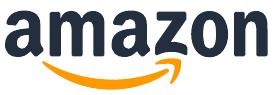

In [ ]:
import base64
from IPython.display import Image, display


import base64
import zlib
import json

def orig_zipped_base64_to_json(orig_zipped_base64: str) -> dict:
    gzipped_data = base64.b64decode(orig_zipped_base64)
    json_string = zlib.decompress(gzipped_data)
    return json.loads(json_string)

def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
      if chunk["type"] == "Image":
        images_b64.append(chunk["metadata"]["image_base64"])
    return images_b64

displayimages = get_images_base64(chunks)


def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(displayimages[1])

# Tables Extraction

In [ ]:
# separate tables from texts
tables = []
image_chunks = []

for data in all_json_data:
    for chunk in data:
        if "Table" in chunk["type"]:
            tables.append(chunk)

        if "Image" in chunk["type"]:
            image_chunks.append(chunk)


In [ ]:
print(len(tables))
print(len(image_chunks))

616
0


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Initialize the model
model = ChatOpenAI(temperature=0.5, model="gpt-4o-mini")

# 1. Prompt for summarization
summary_prompt = ChatPromptTemplate.from_template("""
You are an assistant tasked with summarizing tables.
1. Provide **appropriate name** for the table that clearly reflects its content.
2. Give a concise summary of the table's key data, trends, or insights.
3. Add context to explain the table's purpose, relevance, or what it conveys.
4. At the end Provide **Alternative Name** for the table that clearly reflects its content.


Respond in the following format:
- Table Name: [Name of the table]
- Summary: [Concise summary of key data/trends]
- Context: [Explanation of the table's purpose or relevance]
- Alternative Name: [Alternative name for the table]

Do not include any additional comments or introductory phrases.

Table content: {element}
""")


summarize_chain = {"element": lambda x: x} | summary_prompt | model | StrOutputParser()

In [ ]:
# 3. Summarize texts and tables
# 3. Summarize texts and tables
def generate_summaries_in_chunks(elements):
    for element in elements:
        element_text = element.get("metadata", {}).get("text_as_html", "")  # Get text from the chunk
        if element_text:  # Ensure the text is non-empty
            summary = summarize_chain.invoke(element_text)  # Run the summarization chain
            element["summary"] = summary  # Add the summary to the chunk

# Generate summaries and update the table chunks directly
generate_summaries_in_chunks(tables)

In [ ]:
import os
import json

# Specify the folder path containing your JSON files
folder_path = "/content/drive/MyDrive/Unstructured/op_table/"

# Local file paths to save tables and images JSON
tables_output_path = "/content/drive/MyDrive/Unstructured/op_table/finaltables.json"


# Save tables data into tables.json
with open(tables_output_path, 'w') as tables_file:
    json.dump(tables, tables_file, indent=4)
print(f"Tables data saved to {tables_output_path}")

Tables data saved to /content/drive/MyDrive/Unstructured/op_table/finaltables.json


In [ ]:
'''

# Function to decode image base64 data from metadata
def get_images_base64(image_chunks):
    images_b64 = []
    for image_chunk in image_chunks:
        image_base64 = image_chunk.get("metadata", {}).get("image_base64", "")
        if image_base64:  # Only append if base64 data exists
            images_b64.append(image_base64)
    return images_b64

# Function to generate image summaries and save in chunks
def generate_image_summaries(image_chunks):
    # Prompt setup
    prompt_template = """Image Prompt"""

    prompt = ChatPromptTemplate.from_template("""
    {prompt}
    """)

    # Initialize model
    model = ChatOpenAI(model="gpt-4o-mini")
    chain = prompt | model | StrOutputParser()

    # Loop over image chunks, generate summaries, and save
    for image_chunk in image_chunks:
        image_base64 = image_chunk.get("metadata", {}).get("image_base64", "")
        if image_base64:
            # Prepare the input with base64 image
            image_input = {
                "prompt": prompt_template,
                "image": f"data:image/jpeg;base64,{image_base64}"
            }
            # Invoke the chain for generating the summary
            summary = chain.invoke(image_input)
            image_chunk["summary"] = summary  # Add the summary back to the chunk

            """

            '''

In [ ]:
"""
import os
import base64

# Function to decode image base64 data and save to folder
def save_images_from_base64(image_chunks, folder_path):

    # Ensure the folder exists
    os.makedirs(folder_path, exist_ok=True)

    for idx, image_chunk in enumerate(image_chunks):
        image_base64 = image_chunk.get("metadata", {}).get("image_base64", "")
        if image_base64:
            try:
                # Decode the base64 string
                image_data = base64.b64decode(image_base64)

                # Define the image file name and path
                image_filename = f"image_{idx + 1}.jpg"
                image_path = os.path.join(folder_path, image_filename)

                # Save the image file
                with open(image_path, "wb") as img_file:
                    img_file.write(image_data)

                print(f"Saved: {image_filename}")
            except Exception as e:
                print(f"Error saving image {idx + 1}: {e}")

                # Get base64 images
images_base64 = get_images_base64(image_chunks)

# Generate summaries and save directly in chunks
#generate_image_summaries(image_chunks)
"""

# Weaviate Setup

In [ ]:
# Weaviate Cloud
import os
import weaviate

# Set these environment variables
URL = os.getenv("WEAVIATE_CLUSTER_URL")
APIKEY = os.getenv("WEAVIATE_API_KEY")

# Connect to your WCD instance
client = weaviate.connect_to_wcs(
    cluster_url=URL,
    auth_credentials=weaviate.auth.AuthApiKey(APIKEY),
    headers={
        "X-OpenAI-Api-Key": os.getenv("OPENAI_APIKEY")  # Replace with your OpenAI key
    }
)

client.is_ready()

True

In [ ]:
import weaviate

# Connect to your Waviate instance


# Get the entire schema
collection = client.collections.get("AmazonTable")
schema = collection.config.get(simple=True)


In [ ]:
schema

_CollectionConfigSimple(name='AmazonTable', description=None, generative_config=None, properties=[_Property(name='element_id', description=None, data_type=<DataType.TEXT: 'text'>, index_filterable=True, index_range_filters=False, index_searchable=True, nested_properties=None, tokenization=<Tokenization.WORD: 'word'>, vectorizer_config=_PropertyVectorizerConfig(skip=False, vectorize_property_name=True), vectorizer='text2vec-openai'), _Property(name='text', description=None, data_type=<DataType.TEXT: 'text'>, index_filterable=True, index_range_filters=False, index_searchable=True, nested_properties=None, tokenization=<Tokenization.WORD: 'word'>, vectorizer_config=_PropertyVectorizerConfig(skip=False, vectorize_property_name=True), vectorizer='text2vec-openai'), _Property(name='text_as_html', description=None, data_type=<DataType.TEXT: 'text'>, index_filterable=True, index_range_filters=False, index_searchable=True, nested_properties=None, tokenization=<Tokenization.WORD: 'word'>, vectori

In [ ]:
pip show weaviate-client

Name: weaviate-client
Version: 4.10.2
Summary: A python native Weaviate client
Home-page: https://github.com/weaviate/weaviate-python-client
Author: Weaviate
Author-email: hello@weaviate.io,
License: BSD 3-clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: authlib, grpcio, grpcio-health-checking, grpcio-tools, httpx, pydantic, validators
Required-by: 


In [ ]:
import weaviate
import json



# Load the JSON file
with open("/content/drive/MyDrive/Unstructured/sample.json", "r") as file:
    json_data = json.load(file)
collection_name = "Amazon"
collection = client.collections.get(collection_name)

In [ ]:
type(tables)

list

# Tables Collection Setup

In [ ]:
import weaviate
import weaviate.classes.config as wc
from weaviate.classes.config import Configure
import json
import openai  # OpenAI API for embedding
from uuid import uuid4

# Set your Weaviate and OpenAI API credentials
WEAVIATE_URL = "YOUR_WEAVIATE_CLUSTER_URL"
WEAVIATE_API_KEY = "YOUR_WEAVIATE_API_KEY"
OPENAI_API_KEY = "YOUR_OPENAI_API_KEY"

client = weaviate.connect_to_wcs(
    cluster_url=URL,
    auth_credentials=weaviate.auth.AuthApiKey(APIKEY),
    headers={
        "X-OpenAI-Api-Key": os.getenv("OPENAI_APIKEY")  # Replace with your OpenAI key
    }
)


# Check connection
if client.is_ready():
    print("Connection to Weaviate Cloud is successful!")
else:
    raise ConnectionError("Failed to connect to Weaviate Cloud.")

# Step 1: Create Amazon-Table Collection
client.collections.create(
    name="AmazonTable",
    vectorizer_config=wc.Configure.Vectorizer.text2vec_openai(
        model="text-embedding-3-large",  # OpenAI embedding model
        type_="text"
    ),
    properties=[
        wc.Property(name="element_id", data_type=wc.DataType.TEXT),
        wc.Property(name="text", data_type=wc.DataType.TEXT),
        wc.Property(name="text_as_html", data_type=wc.DataType.TEXT),
        wc.Property(name="page_number", data_type=wc.DataType.INT, skip_vectorization=True),
        wc.Property(name="filename", data_type=wc.DataType.TEXT),
        wc.Property(name="orig_elements", data_type=wc.DataType.TEXT),
        wc.Property(name="summary", data_type=wc.DataType.TEXT),
        wc.Property(name="embedding", data_type=wc.DataType.NUMBER_ARRAY, skip_vectorization=True)
    ]
)
print("Collection Amazon-Table created successfully.")

# Step 2: Generate Embeddings for `text` Property
def embed_text(text):
    response = openai.Embedding.create(
        model="text-embedding-3-large",
        input=text
    )
    return response['data'][0]['embedding']




Connection to Weaviate Cloud is successful!
Collection Amazon-Table created successfully.


In [ ]:
import json
import openai  # OpenAI API for embedding


openai.api_key = os.getenv("OPENAI_APIKEY")
# Input and Output JSON File Paths
input_json_file = "/content/drive/MyDrive/Unstructured/op_table/finaltables.json"  # Input JSON file with multiple table entries
output_json_file = "/content/drive/MyDrive/Unstructured/op_table/tables_data_embedded.json"  # Output JSON file with embeddings

# Function to generate embeddings for text using the latest OpenAI client
def embed_text(text):
    """
    Generate embeddings for a given text using OpenAI's text-embedding-3-large model.
    """
    if not text:
        return []  # Return empty embedding if text is empty

    try:
        # Call the updated embeddings endpoint
        response = openai.embeddings.create(
            model="text-embedding-3-large",  # Latest embedding model
            input=text
        )
        return response.data[0].embedding  # Access embedding from the response
    except Exception as e:
        print(f"Error generating embedding: {e}")
        return []

# Step 1: Load the JSON data
with open(input_json_file, "r") as file:
    table_entries = json.load(file)

print(f"Loaded {len(table_entries)} table entries for processing.")

# Step 2: Process each entry and generate embeddings
for idx, entry in enumerate(table_entries):
    try:
        # Combine text_as_html and summary to generate embeddings
        text = "Table: " + entry.get("text_as_html", "") + " Summary: " + entry.get("summary", "")
        if text.strip():  # Ensure the text is not empty
            # Generate and add embedding
            entry["embedding"] = embed_text(text)
            print(f"Embedded entry {idx + 1}/{len(table_entries)}")
        else:
            entry["embedding"] = []
            print(f"Entry {idx + 1} has no valid text. Skipping embedding.")
    except Exception as e:
        print(f"Error processing entry {idx + 1}: {e}")
        entry["embedding"] = []

# Step 3: Save the updated JSON with embeddings
with open(output_json_file, "w") as file:
    json.dump(table_entries, file, indent=4)

print(f"Embedded data saved to {output_json_file}")


Loaded 616 table entries for processing.
Embedded entry 1/616
Embedded entry 2/616
Embedded entry 3/616
Embedded entry 4/616
Embedded entry 5/616
Embedded entry 6/616
Embedded entry 7/616
Embedded entry 8/616
Embedded entry 9/616
Embedded entry 10/616
Embedded entry 11/616
Embedded entry 12/616
Embedded entry 13/616
Embedded entry 14/616
Embedded entry 15/616
Embedded entry 16/616
Embedded entry 17/616
Embedded entry 18/616
Embedded entry 19/616
Embedded entry 20/616
Embedded entry 21/616
Embedded entry 22/616
Embedded entry 23/616
Embedded entry 24/616
Embedded entry 25/616
Embedded entry 26/616
Embedded entry 27/616
Embedded entry 28/616
Embedded entry 29/616
Embedded entry 30/616
Embedded entry 31/616
Embedded entry 32/616
Embedded entry 33/616
Embedded entry 34/616
Embedded entry 35/616
Embedded entry 36/616
Embedded entry 37/616
Embedded entry 38/616
Embedded entry 39/616
Embedded entry 40/616
Embedded entry 41/616
Embedded entry 42/616
Embedded entry 43/616
Embedded entry 44/616


In [ ]:
# Input JSON file containing processed tables
input_json_file = "/content/drive/MyDrive/Unstructured/op_table/tables_data_embedded.json"  # Path to JSON file

# Load the JSON data
with open(input_json_file, "r") as file:
    json_data = json.load(file)

# Step 1: Insert data into the AmazonTable collection
collection = client.collections.get("AmazonTable")  # Ensure the collection name matches the schema

for idx, item in enumerate(json_data):
    try:
        metadata = item.get("metadata", {})
        # Map the data to Weaviate schema
        data_object = {
            "element_id": item.get("element_id", ""),
            "text": item.get("text", ""),
            "text_as_html": metadata.get("text_as_html", ""),
            "page_number": int(metadata.get("page_number", 0)),  # Ensure page_number is int
            "filename": metadata.get("filename", ""),
            "orig_elements": metadata.get("orig_elements", ""),
            "summary": item.get("summary", ""),
            "embedding": item.get("embedding", [])
        }

        # Insert data into Weaviate
        uuid = collection.data.insert(properties=data_object)
        print(f"Successfully inserted object {idx + 1} with UUID: {uuid}")
    except Exception as e:
        print(f"Error inserting object {idx + 1}: {e}")

print("Data insertion complete!")

Successfully inserted object 1 with UUID: 0378ad6c-3bc3-4cff-985c-d495cab12e1a
Successfully inserted object 2 with UUID: 196c655c-4bc1-4580-9e70-9f2ce618deba
Successfully inserted object 3 with UUID: 553addd0-51d1-4fbb-95d9-3701cfbc827c
Successfully inserted object 4 with UUID: 3eec9fc0-9fb3-467b-b291-eee2cb233dcd
Successfully inserted object 5 with UUID: 700ed4ca-3407-4b7c-8356-7f4951768f78
Successfully inserted object 6 with UUID: 4eb96641-2320-45f7-b2ac-d0087a76bcf6
Successfully inserted object 7 with UUID: de80199c-56ff-4a2f-a8b8-6eecd73d61db
Successfully inserted object 8 with UUID: 650bf08c-3d21-41cf-9471-6529240a0a0b
Successfully inserted object 9 with UUID: 9f44e24f-5bf8-4cf1-a683-c3f94cb5d9ea
Successfully inserted object 10 with UUID: b6b0670a-4b40-4871-a2af-47d2db6c6fd0
Successfully inserted object 11 with UUID: 51b91e12-8026-4558-9031-36a11a0ba336
Successfully inserted object 12 with UUID: 8e0f7328-8cb5-427a-b5e4-cf367bae1774
Successfully inserted object 13 with UUID: c6275b

# Cross Reference Table and Main Colelction

In [ ]:
from weaviate.classes.config import ReferenceProperty

# Fetch the Amazon collection
amazon = client.collections.get("Amazon")

# Add the cross-reference property
amazon.config.add_reference(
    ReferenceProperty(
        name="tableReference",  # Name of the cross-reference property
        target_collection="AmazonTable"  # The target collection to link
    )
)

print("Cross-reference property 'tableReference' added successfully!")


Cross-reference property 'tableReference' added successfully!


In [ ]:
# Fetch Amazon and AmazonTable objects
amazon = client.collections.get("Amazon")
amazon_table = client.collections.get("AmazonTable")

# Retrieve objects with their element_id and Weaviate-generated UUIDs
amazon_data = amazon.query.fetch_objects(return_properties=["element_id"]).objects
amazon_table_data = amazon_table.query.fetch_objects(return_properties=["element_id"]).objects

# Create a mapping of element_id -> AmazonTable UUID
table_id_map = {obj.properties["element_id"]: obj.uuid for obj in amazon_table_data}

# Link Amazon objects to AmazonTable using element_id
for amazon_obj in amazon_data:
    amazon_element_id = amazon_obj.properties["element_id"]
    if amazon_element_id in table_id_map:
        amazon_table_uuid = table_id_map[amazon_element_id]

        # Add reference to Amazon object
        amazon.data.reference_add(
            from_uuid=amazon_obj.uuid,  # Amazon object UUID
            from_property="tableReference",  # Cross-reference property name
            to=amazon_table_uuid  # Matched AmazonTable object UUID
        )
        print(f"Linked Amazon {amazon_element_id} to AmazonTable {amazon_element_id}")


In [ ]:
# Fetch all element_id values from Amazon
amazon = client.collections.get("Amazon")
amazon_data = amazon.query.fetch_objects(return_properties=["element_id"]).objects

# Fetch all element_id values from AmazonTable
amazon_table = client.collections.get("AmazonTable")
amazon_table_data = amazon_table.query.fetch_objects(return_properties=["element_id"]).objects

# Extract element_id as lists
amazon_element_ids = [obj.properties["element_id"] for obj in amazon_data if "element_id" in obj.properties]
amazon_table_element_ids = [obj.properties["element_id"] for obj in amazon_table_data if "element_id" in obj.properties]

# Print the lists
print("Amazon Collection element_id values:")
print(amazon_element_ids)

print("\nAmazonTable Collection element_id values:")
print(amazon_table_element_ids)


Amazon Collection element_id values:
['531d3aa1ec3322ae44d8bfdb451172af', '53524492efbb064da5f1302ee78e9b9c', '511ef2a82dbca8c5f4b1e879d1a44a49', 'd91101ae066962e6edd879ab1613394e', '78097684002111ed150c6175ca22827b', '6df2f70e8f951633cc06a5806e4011e7', '3eeb83e4fe37b834df4b5955c82d4fb7', '30ad29f07f65865db482071422193ead', '4970f4ba9bdb68c326acedd2e787aba2', '4fbd99aa96ff8e2f87120c6aa4df1d85']

AmazonTable Collection element_id values:
['c00fe41f184bbd5ea0d97af9235b6b75', 'dd2a55cc175c3872752f2bc19d5c9a97', '50c1f5666eb1757c83ea6a88bc68fe3d', 'acbec857084a55bb8cec2ab3bca069e7', '4856b5aa0615aa956ee06a0c948720ac', 'c294cf6262804e2b656e8673bc7bb222', '959ed6a6e735d261d6904fd6593886f6', '91004102c21f2751af660da9fb35aa3d', '24ad5f9812ed1167efcd234b5ab7c661', '04f7d1d5b66f6e7bfe4769e8a05ff9bd']


In [ ]:
def fetch_all_objects(collection, property_name, limit=100):
    all_objects = []
    offset = 0

    while True:
        response = collection.query.fetch_objects(
            return_properties=[property_name],
            limit=limit,
            offset=offset
        ).objects

        if not response:  # Stop if no more objects are returned
            break

        all_objects.extend(response)
        offset += limit  # Increment the offset to fetch the next batch

    return all_objects

# Fetch Amazon and AmazonTable objects
amazon = client.collections.get("Amazon")
amazon_table = client.collections.get("AmazonTable")



In [ ]:
# Step 1: Fetch all objects with 'element_id' using pagination
amazon = client.collections.get("Amazon")
amazon_table = client.collections.get("AmazonTable")

amazon_data = fetch_all_objects(amazon, "element_id")
amazon_table_data = fetch_all_objects(amazon_table, "element_id")

# Step 2: Extract element_id values and create mappings
amazon_element_ids = {obj.properties["element_id"]: obj.uuid for obj in amazon_data if "element_id" in obj.properties}
amazon_table_element_ids = {obj.properties["element_id"]: obj.uuid for obj in amazon_table_data if "element_id" in obj.properties}


# Print the full lists
print("Amazon Collection element_id values:")
print(len(amazon_element_ids))

print("\nAmazonTable Collection element_id values:")
print(len(amazon_table_element_ids))

Amazon Collection element_id values:
6692

AmazonTable Collection element_id values:
616


In [ ]:
from weaviate.classes.data import DataReference

# Step 1: Match element_id values and count matches
matched_pairs = []
for element_id, amazon_uuid in amazon_element_ids.items():
    if element_id in amazon_table_element_ids:
        amazon_table_uuid = amazon_table_element_ids[element_id]
        matched_pairs.append((amazon_uuid, amazon_table_uuid))

# Step 2: Print the number of matched pairs
print(f"Number of matched element_id pairs: {len(matched_pairs)}")


Number of matched element_id pairs: 616


In [ ]:
from weaviate.classes.config import ReferenceProperty

# Fetch the AmazonTable collection
amazon_table = client.collections.get("Amazon")

# Add the cross-reference property to AmazonTable
amazon_table.config.add_reference(
    ReferenceProperty(
        name="tableReference",  # Name of the cross-reference property
        target_collection="AmazonTable"  # Reference back to the Amazon collection
    )
)

print("Cross-reference property 'tableReference' added to Amazon successfully!")


In [ ]:
from weaviate.classes.config import ReferenceProperty

# Fetch the AmazonTable collection
amazon_table = client.collections.get("AmazonTable")

# Add the cross-reference property to AmazonTable
amazon_table.config.add_reference(
    ReferenceProperty(
        name="tableReference",  # Name of the cross-reference property
        target_collection="Amazon"  # Reference back to the Amazon collection
    )
)

print("Cross-reference property 'tableReference' added to AmazonTable successfully!")


Cross-reference property 'tableReference' added to AmazonTable successfully!


In [ ]:
# Step 3: Add two-way cross-references
for amazon_uuid, amazon_table_uuid in matched_pairs:
    # Add reference from Amazon -> AmazonTable
    amazon.data.reference_add(
        from_uuid=amazon_uuid,
        from_property="tableReference",
        to=amazon_table_uuid
    )

    # Add reference from AmazonTable -> Amazon
    amazon_table.data.reference_add(
        from_uuid=amazon_table_uuid,
        from_property="tableReference",  # Ensure AmazonTable has this property
        to=amazon_uuid
    )

print("Two-way cross-references added successfully!")

Two-way cross-references added successfully!


#Metadata Cross Referencing

In [ ]:
import json
import glob
import os

# List of specific metadata fields to extract
FIELDS_TO_EXTRACT = [
    "parent_id",
    "page_number",
    "is_continuation",
    "orig_elements",
    "image_base64",
    "image_mime_type",
    "text_as_html",
    "filename",
    "filetype",
    "languages"
]

def extract_selected_metadata_with_element_id(input_folder, output_file):
    """
    Extract element_id (top-level) and specified metadata fields from multiple JSON files
    and save to a single consolidated file.

    Args:
        input_folder (str): Path to the folder containing JSON files.
        output_file (str): Path to save the consolidated metadata JSON file.
    """
    extracted_data = []

    # Find all JSON files in the folder
    json_files = glob.glob(os.path.join(input_folder, "*.json"))
    print(f"Found {len(json_files)} JSON files in '{input_folder}'.")

    # Process each JSON file
    for file_path in json_files:
        try:
            with open(file_path, "r") as file:
                data = json.load(file)

                # If data is a list of objects
                if isinstance(data, list):
                    for obj in data:
                        # Extract top-level element_id
                        element_id = obj.get("element_id", None)
                        metadata = obj.get("metadata", {})

                        # Extract specific metadata fields
                        extracted_metadata = {field: metadata.get(field, None) for field in FIELDS_TO_EXTRACT}

                        # Include element_id as a top-level field
                        extracted_metadata["element_id"] = element_id
                        extracted_data.append(extracted_metadata)

                # If data is a single object
                elif isinstance(data, dict):
                    # Extract top-level element_id
                    element_id = data.get("element_id", None)
                    metadata = data.get("metadata", {})

                    # Extract specific metadata fields
                    extracted_metadata = {field: metadata.get(field, None) for field in FIELDS_TO_EXTRACT}

                    # Include element_id as a top-level field
                    extracted_metadata["element_id"] = element_id
                    extracted_data.append(extracted_metadata)

                print(f"Processed: {file_path}")

        except json.JSONDecodeError as e:
            print(f"Error reading {file_path}: {e}")

    # Save extracted data to a consolidated JSON file
    with open(output_file, "w") as outfile:
        json.dump(extracted_data, outfile, indent=4)

    print(f"Extracted metadata saved to '{output_file}'.")

# Define the input folder and output file
input_folder = "/content/drive/MyDrive/Unstructured/uploadFinal/"  # Folder with JSON files
output_file = "/content/drive/MyDrive/Unstructured/uploadFinal/extracted_metadata.json"

# Run the extraction
extract_selected_metadata_with_element_id(input_folder, output_file)


Found 18 JSON files in '/content/drive/MyDrive/Unstructured/uploadFinal/'.
Processed: /content/drive/MyDrive/Unstructured/uploadFinal/406e3e7cbc09.json
Processed: /content/drive/MyDrive/Unstructured/uploadFinal/5ae717e4a267.json
Processed: /content/drive/MyDrive/Unstructured/uploadFinal/6e911d492aad.json
Processed: /content/drive/MyDrive/Unstructured/uploadFinal/9c0c60d95107.json
Processed: /content/drive/MyDrive/Unstructured/uploadFinal/46adab8e8ade.json
Processed: /content/drive/MyDrive/Unstructured/uploadFinal/998a437a656e.json
Processed: /content/drive/MyDrive/Unstructured/uploadFinal/6685c8980b80.json
Processed: /content/drive/MyDrive/Unstructured/uploadFinal/7212bf13a865.json
Processed: /content/drive/MyDrive/Unstructured/uploadFinal/12670b51e4fe.json
Processed: /content/drive/MyDrive/Unstructured/uploadFinal/a5b3b29ea8e9.json
Processed: /content/drive/MyDrive/Unstructured/uploadFinal/a6f42d0a153f.json
Processed: /content/drive/MyDrive/Unstructured/uploadFinal/b1ca66baf887.json
P

In [ ]:
# Check connection
if client.is_ready():
    print("Connection to Weaviate Cloud is successful!")
else:
    raise ConnectionError("Failed to connect to Weaviate Cloud.")

# Step 1: Create AmazonMetadata Collection
client.collections.create(
    name="AmazonMetadata",
    properties=[
        wc.Property(name="element_id", data_type=wc.DataType.TEXT, description="Unique identifier for metadata."),
        wc.Property(name="parent_id", data_type=wc.DataType.TEXT, description="Reference to the parent element."),
        wc.Property(name="page_number", data_type=wc.DataType.INT, skip_vectorization=True, description="Page number where the metadata is found."),
        wc.Property(name="is_continuation", data_type=wc.DataType.TEXT, skip_vectorization=True, description="Indicates if the element is a continuation."),
        wc.Property(name="orig_elements", data_type=wc.DataType.TEXT, description="Original encoded elements."),
        wc.Property(name="image_base64", data_type=wc.DataType.TEXT, description="Base64 encoded image."),
        wc.Property(name="image_mime_type", data_type=wc.DataType.TEXT, description="MIME type of the image."),
        wc.Property(name="text_as_html", data_type=wc.DataType.TEXT, description="HTML representation of the text."),
        wc.Property(name="filename", data_type=wc.DataType.TEXT, description="Name of the file."),
        wc.Property(name="filetype", data_type=wc.DataType.TEXT, description="Type of the file."),
        wc.Property(name="languages", data_type=wc.DataType.TEXT_ARRAY, description="Languages present in the content."),
    ]
)

print("Collection AmazonMetadata created successfully.")

Connection to Weaviate Cloud is successful!
Collection AmazonMetadata created successfully.


In [ ]:
import json
from weaviate import Client
from uuid import uuid4


# Input JSON file containing extracted metadata
input_json_file = "/content/drive/MyDrive/Unstructured/uploadFinal/extracted_metadata.json"

# Load the JSON data
with open(input_json_file, "r") as file:
    json_data = json.load(file)

# Step 1: Define the AmazonMetadata collection
collection = client.collections.get("AmazonMetadata")  # Ensure the collection name matches the schema

# Step 2: Insert data into the AmazonMetadata collection
for idx, item in enumerate(json_data):
    try:
        # Safely handle 'is_continuation' to ensure it is a string
        is_continuation = item.get("is_continuation", "")
        if isinstance(is_continuation, bool):
            is_continuation = str(is_continuation).lower()

        # Ensure 'page_number' is an integer
        page_number = int(item.get("page_number", 0))

        # Map the data to the Weaviate schema
        data_object = {
            "element_id": item.get("element_id",""),
            "parent_id": item.get("parent_id", ""),
            "page_number": page_number,
            "is_continuation": is_continuation,
            "orig_elements": item.get("orig_elements", ""),
            "image_base64": item.get("image_base64", ""),
            "image_mime_type": item.get("image_mime_type", ""),
            "text_as_html": item.get("text_as_html", ""),
            "filename": item.get("filename", ""),
            "filetype": item.get("filetype", ""),
            "languages": item.get("languages", [])
        }

        # Insert data into Weaviate
        uuid = collection.data.insert(properties=data_object)
        print(f"Successfully inserted object {idx + 1} with UUID: {uuid}")

    except Exception as e:
        print(f"Error inserting object {idx + 1}: {e}")

print("Metadata data insertion complete!")


In [ ]:
from weaviate.classes.config import ReferenceProperty
from weaviate.classes.data import DataReference


# Step 1: Add a cross-reference property to the Amazon collection
amazon = client.collections.get("Amazon")

# Add the cross-reference property
amazon.config.add_reference(
    ReferenceProperty(
        name="metadataReference",  # Name of the cross-reference property
        target_collection="AmazonMetadata"  # Target collection for reference
    )
)
print("Cross-reference property 'metadataReference' added successfully!")



In [ ]:
def fetch_all_objects(collection, property_name, limit=100):
    all_objects = []
    offset = 0

    while True:
        response = collection.query.fetch_objects(
            return_properties=[property_name],
            limit=limit,
            offset=offset
        ).objects

        if not response:  # Stop if no more objects are returned
            break

        all_objects.extend(response)
        offset += limit  # Increment the offset to fetch the next batch

    return all_objects

In [ ]:
amazon = client.collections.get("Amazon")
# Step 2: Fetch Amazon and AmazonMetadata objects
amazon_metadata = client.collections.get("AmazonMetadata")

# Fetch 'element_id' from both collections
amazon_data = fetch_all_objects(amazon, "element_id")
amazon_metadata_data = fetch_all_objects(amazon_metadata, "element_id")

# Step 3: Extract element_id values and create mappings
amazon_element_ids = {obj.properties["element_id"]: obj.uuid for obj in amazon_data if "element_id" in obj.properties}
amazon_metadata_element_ids = {obj.properties["element_id"]: obj.uuid for obj in amazon_metadata_data if "element_id" in obj.properties}
# Print the full lists
print("Amazon Collection element_id values:")
print(len(amazon_element_ids))

print("\nAmazonTable Collection metadat element_id values:")
print(len(amazon_metadata_element_ids))
# Step 4: Match element_id values and create one-way references


Amazon Collection element_id values:
6692

AmazonTable Collection metadat element_id values:
6691


In [ ]:
matched_pairs = []
for element_id, amazon_uuid in amazon_element_ids.items():
    if element_id in amazon_metadata_element_ids:
        amazon_metadata_uuid = amazon_metadata_element_ids[element_id]
        matched_pairs.append((amazon_uuid, amazon_metadata_uuid))

print(f"Number of matched element_id pairs: {len(matched_pairs)}")




Number of matched element_id pairs: 6691


In [ ]:
# Step 5: Add one-way references from Amazon -> AmazonMetadata
for amazon_uuid, amazon_metadata_uuid in matched_pairs:
    amazon.data.reference_add(
        from_uuid=amazon_uuid,
        from_property="metadataReference",
        to=amazon_metadata_uuid
    )

print("One-way cross-references added successfully!")

One-way cross-references added successfully!


# Weaviate Retrieval

In [ ]:
from weaviate.classes.config import DataType

def fetch_and_print_collection_config(collection):
    """
    Fetches and prints the properties, nested properties, and references of a Weaviate collection.

    Args:
        collection: The Weaviate collection object.
    """
    # Fetch collection configuration
    config = collection.config.get()

    # Initialize lists for properties, nested properties, and references
    properties = []
    nested_properties = {}
    references = []

    # Process properties and categorize them
    for prop in config.properties:
        prop_name = prop.name
        prop_type = prop.data_type
        properties.append({"name": prop_name, "type": prop_type})

        # Check for nested properties
        if prop_type == DataType.OBJECT and prop.nested_properties:
            nested_properties[prop_name] = [{"name": np.name, "type": np.data_type} for np in prop.nested_properties]

    # Process references separately
    for ref in config.references:
        references.append({
            "name": ref.name,
            "target_collections": ref.target_collections
        })

    # Display the results
    print(f"\nCollection: {collection.name}")
    print("Properties:")
    for prop in properties:
        print(f" - Name: {prop['name']}, Type: {prop['type']}")

    print("\nNested Properties:")
    for prop_name, nested_props in nested_properties.items():
        print(f" - {prop_name}:")
        for np in nested_props:
            print(f"   - Name: {np['name']}, Type: {np['type']}")

    print("\nReferences:")
    for ref in references:
        print(f" - Name: {ref['name']}, Target Collections: {ref['target_collections']}")
    print("-" * 50)

# Fetch collections
amazon_collection = client.collections.get("Amazon")
amazon_table_collection = client.collections.get("AmazonTable")
amazon_metadata_collection = client.collections.get("AmazonMetadata")

# Print configurations for all collections
fetch_and_print_collection_config(amazon_collection)
fetch_and_print_collection_config(amazon_table_collection)
fetch_and_print_collection_config(amazon_metadata_collection)


Collection: Amazon
Properties:
 - Name: record_id, Type: text
 - Name: element_id, Type: text
 - Name: text, Type: text
 - Name: summary, Type: text
 - Name: embeddings, Type: number[]
 - Name: metadata, Type: object
 - Name: type, Type: text

Nested Properties:
 - metadata:
   - Name: parent_id, Type: text
   - Name: page_number, Type: text
   - Name: is_continuation, Type: boolean
   - Name: orig_elements, Type: text
   - Name: image_base64, Type: text
   - Name: image_mime_type, Type: text
   - Name: text_as_html, Type: text
   - Name: filename, Type: text
   - Name: filetype, Type: text
   - Name: languages, Type: text[]
   - Name: data_source, Type: object

References:
 - Name: tableReference, Target Collections: ['AmazonTable']
 - Name: hasTables, Target Collections: ['AmazonTable']
 - Name: metadataReference, Target Collections: ['AmazonMetadata']
--------------------------------------------------

Collection: AmazonTable
Properties:
 - Name: element_id, Type: text
 - Name: tex

# Ragas Eval

In [ ]:
from langchain import LLMChain
from langchain.prompts import ChatPromptTemplate
from langchain.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain.chains import RetrievalQA
from langchain_community.vectorstores.utils import filter_complex_metadata  # Import filter
from langchain_core.documents import Document


# Prepare documents with cleaned metadata
documents = []
for chunk in chunks:
    metadata = chunk.metadata.to_dict()
    cleaned_metadata = clean_metadata(metadata)  # Clean metadata manually
    documents.append(Document(page_content=chunk.text, metadata=cleaned_metadata))

# Use OpenAI's embedding model
db = Chroma.from_documents(documents, OpenAIEmbeddings(model="text-embedding-3-large"))
retriever = db.as_retriever(search_type="similarity", search_kwargs={"k": 4})

In [ ]:
documents

[Document(metadata={'data_source': "{'record_locator': {'path': '/content/drive/MyDrive/Unstructured/input/amazon_code_of_conduct.pdf'}, 'date_modified': '1734034965.0', 'date_processed': '1734035191.1482077', 'permissions_data': [{'mode': 33152}]}", 'filename': 'amazon_code_of_conduct.pdf', 'filetype': 'application/pdf', 'languages': 'eng', 'page_number': 1, 'orig_elements': 'eJztVMtu2zAQ/BVCZ8N6U1aPTXIokPYQpKcgENbk0iZAkSofcV3D/15SdmKjh6I9tKecKFHDmd2dEZ8OGSocUftB8uwDyRgtqhpESwUTZcVX0BUVXdO+aIuO1dBlC5KN6IGDh4g/ZOlhcCZYhq/vOIyGSyFxZiy7uinqpqftskinZ8BkDUPnrhFt2ZfLsllVRTerTGhH6Zw02g1ntadDFpmTTl2XbXV8jjCLzFg+KMPAGzuXMIHfJt6cGe1jazm38gXzz/vbef2qnbeB+WCR51JPwecwwg+jBxbJByPiqnkELCcusuMxigipUMOYlLPfYM9Iv59OyGlSMpYVW8jPnxXoTYANutRNhnqTpR6muDPoMK4xNVAmRY/ffeK4iTLECPIxOKnjxMjNSY+A5uTObyVzifdV8lF6hVkk+NXXWjRdj6KHdt0BsErUWDRN3zPO+lVf8ndf/6+vn5bRyTHygGZIdtJvyT3s3II8BIVudvcBN0HNKn9m8apjlFJOK7oqmoJ3lAJreuyL1bpEIei7xf/e4nnH/sVvd52Ju5gHs8do/xicJ8IoZXbkXMpaIVFzQmxKyGKOiL1EhEC8E5QiXo7oluTCNWfrW0B3hq1N8MRv

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough, RunnableLambda


llm_model = "gpt-4o-mini"
# 2. Define the Large Language Model (LLM)
llm = ChatOpenAI(model=llm_model, temperature=0)

# 3. Define the prompt template
prompt = ChatPromptTemplate.from_template(
    "Using only the provided context, answer the question concisely:\n\n"
    "Context:\n{context}\n\n"
    "Question:\n{question}\n\n"
    "Answer:"
)

# 4. Define document formatting function (combines retrieved documents)
def format_docs(docs):
    """Format retrieved documents into a single string."""
    return "\n\n".join(doc.page_content for doc in docs)

# 5. Combine components into a runnable chain
retrieval_chain = (
    {
        "context": retriever | RunnableLambda(format_docs),  # Retrieve and format context
        "question": RunnablePassthrough()  # Pass the question directly
    }
    | prompt   # Pass into the prompt template
    | llm      # Generate response using the LLM
    | StrOutputParser()  # Parse LLM's response into a string
)

In [ ]:
import re
def extract_final_answer(text):
    # Define a regex pattern to capture text after "Final Answer:" up to the next section (Additional Context)
    pattern = r"Final Answer:\s*(.*?)\s*Additional Context:"

    # Search the text using the regex pattern
    match = re.search(pattern, text, re.DOTALL)

    # Return the extracted text if a match is found
    if match:
        return match.group(1).strip()
    else:
        return None


In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough, RunnableLambda

# Define the LLM
llm_model = "gpt-4o-mini"
llm = ChatOpenAI(model=llm_model, temperature=0)

# Step 1: Define Reasoner Prompt
reasoner_prompt = ChatPromptTemplate.from_template(
    """As the Reasoner, your role is to carefully analyze the provided context and question.
Think step by step and generate a detailed initial response that addresses the question accurately.

Context:
{context}

Question:
{question}

Initial Answer:"""
)

# Step 2: Define Refiner Prompt
refiner_prompt = ChatPromptTemplate.from_template(
    """As the Refiner, your role is to improve the Reasoner's initial answer to make it concise, clear, and directly answer the question.
Additionally, include supplementary information in a structured format.

Follow this template for your response:

Final Answer:
[Provide a concise answer to the question here]

Additional Context: [Provide supporting information]

Context:
{context}

Question:
{question}

Initial Answer:
{initial_answer}
"""
)

# Step 3: Document Formatting Function
def format_docs(docs):
    """Format retrieved documents into a single string."""
    return "\n\n".join(doc.page_content for doc in docs)

# Step 4: Define Reasoner Chain
reasoner_chain = (
    {
        "context": retriever | RunnableLambda(format_docs),  # Retrieve and format the context
        "question": RunnablePassthrough()  # Pass the question
    }
    | reasoner_prompt  # Pass to Reasoner Prompt
    | llm  # Generate response using LLM
    | StrOutputParser()  # Parse the output
)

# Step 5: Define Refiner Chain
retrieval_chain = (
    {
        "context": retriever | RunnableLambda(format_docs),  # Use the same context
        "question": RunnablePassthrough(),  # Pass the question
        "initial_answer": reasoner_chain  # Pass the output from Reasoner Chain
    }
    | refiner_prompt  # Pass to Refiner Prompt
    | llm  # Generate refined response using LLM
    | StrOutputParser()  # Parse the output
    | RunnableLambda(lambda x: extract_final_answer(x))
)





In [ ]:
# Step 7: Test the chain
question = "What information about smelters and refiners does Amazon disclose, and why is this important?"
response = retrieval_chain.invoke(question)
print("\nAnswer:", response)


Answer: Amazon discloses information about smelters and refiners in its supply chain to promote responsible sourcing of conflict minerals (gold, tin, tungsten, tantalum). This includes the names and locations of these entities.


In [ ]:
pip install ragas

In [ ]:
import pandas as pd
from ragas import evaluate
from ragas.metrics import faithfulness, answer_relevancy, context_precision
from datasets import Dataset

def format_docs_with_metadata(docs):
    """Format retrieved documents into a string with metadata."""
    return "\n\n".join(
        f"Page: {doc.metadata.get('page', 'N/A')}\nContent: {doc.page_content}"
        for doc in docs
    )

#
# Step 4: Load the synthetic test dataset
csv_file = "/content/master_testsetv1.csv"  # Replace with the correct file path
df = pd.read_csv(csv_file)

# Prepare evaluation inputs
evaluation_inputs = []

print("Preparing evaluation inputs...")
for _, row in df.iterrows():
    query = row['user_input']  # Replace with the query column name
    ground_truth = row['reference']  # Replace with the ground_truth column name

    # Invoke the retrieval chain for the query
    response = retrieval_chain.invoke(query)
    generated_answer = response

    # Combine the retrieved contexts
    retrieved_docs = retriever.invoke(query)
    combined_contexts = format_docs_with_metadata(retrieved_docs)

    # Append inputs for Ragas evaluation
    evaluation_inputs.append({
        "user_input": query,
        "contexts": combined_contexts,
        "ground_truth": ground_truth,
        "answer": generated_answer
    })

# Step 5: Convert to Ragas Dataset
evaluation_dataset = Dataset.from_list(evaluation_inputs)

Preparing evaluation inputs...


In [ ]:
# Convert 'contexts' field in evaluation_inputs to a list
for item in evaluation_inputs:
    if isinstance(item['contexts'], str):
        # Split the single string context into a list of contexts using "\n\n" as a delimiter
        item['contexts'] = item['contexts'].split("\n\n")
    elif not isinstance(item['contexts'], list):
        # If 'contexts' is not a list or string, wrap it in a list
        item['contexts'] = [item['contexts']]

# Verify the change
print("Fixed evaluation_inputs:\n", evaluation_inputs[:1])  # Print the first sample to check


Fixed evaluation_inputs:
 [{'user_input': 'What did Andy Jassy say about the performance of Amazon in the first quarter of 2024?', 'contexts': ['Page: N/A\nContent: “It was a good start to the year across the business, and you can see that in both our customer experience improvements and financial results,” said Andy Jassy, Amazon President and CEO. “The combination of companies renewing their infrastructure modernization efforts and the appeal of AWS’s AI capabilities is reaccelerating AWS’s growth rate (now at a $100 billion annual revenue run rate); our Stores business continues to expand selection, provide everyday low prices, and accelerate delivery', 'Page: N/A\nContent: “It was a good start to the year across the business, and you can see that in both our customer experience improvements and financial results,” said Andy Jassy, Amazon President and CEO. “The combination of companies renewing their infrastructure modernization efforts and the appeal of AWS’s AI capabilities is re

In [ ]:
print(type(evaluation_inputs))
evaluation_dataset = Dataset.from_list(evaluation_inputs)
print(evaluation_dataset)
print(type(evaluation_dataset))
# Step 6: Evaluate the RAG pipeline using Ragas
results = evaluate(
    evaluation_dataset,
    metrics=[faithfulness, answer_relevancy, context_precision]
)

# Display results
print("\nRAG Pipeline Evaluation Results:")
print("Faithfulness:", results['faithfulness'])
print("Answer Relevancy:", results['answer_relevancy'])
print("Context Precision:", results['context_precision'])

<class 'list'>
Dataset({
    features: ['user_input', 'contexts', 'ground_truth', 'answer'],
    num_rows: 300
})
<class 'datasets.arrow_dataset.Dataset'>


Evaluating:   0%|          | 0/900 [00:00<?, ?it/s]


RAG Pipeline Evaluation Results:
Faithfulness: [0.9090909090909091, 0.6666666666666666, 1.0, 1.0, 0.25, 0.4, 1.0, 0.6666666666666666, 0.75, 0.3333333333333333, 0.125, 1.0, 1.0, 0.5, 0.0, 0.4, 0.0, 0.0, 1.0, 0.125, 0.09090909090909091, 0.0, 1.0, 1.0, 0.8333333333333334, 0.8, 0.0, 1.0, 0.75, 0.4, 0.75, 1.0, 1.0, 0.14285714285714285, 1.0, 0.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0.0, 0.14285714285714285, 0.0, 1.0, 0.6, 0.8, 1.0, 0.2222222222222222, 0.3333333333333333, 1.0, 0.16666666666666666, 0.7142857142857143, 0.3333333333333333, 0.2, 0.5555555555555556, 1.0, 1.0, 1.0, 0.25, 0.5, 0.0, 0.16666666666666666, 0.5, 0.8, 0.5, 0.4, 0.09090909090909091, 1.0, 0.8, 1.0, 0.0, 1.0, 1.0, 0.8571428571428571, 0.6666666666666666, 0.8333333333333334, 0.5, 1.0, 1.0, 0.9090909090909091, 1.0, 0.0, 0.25, 0.6, 0.0, 0.5, 0.0, 0.5384615384615384, 0.7142857142857143, 0.0, 0.3333333333333333, 0.0, 0.5, 0.5714285714285714, 1.0, 0.3333333333333333, 1.0, 0.4, 0.3333333333333333, 0.0, 0.6666666666666

In [ ]:
results

{'faithfulness': 0.5076, 'answer_relevancy': 0.8927, 'context_precision': 0.7531}

In [ ]:
import json
# File path to save the JSON data
file_path = "Unstructured_v2.5_evaluation_inputs_tablesimage.json"

# Save data to a JSON file
with open(file_path, "w") as json_file:
    json.dump(evaluation_inputs, json_file, indent=4)

print(f"Evaluation inputs saved to {file_path}")

Evaluation inputs saved to Unstructured_v2.5_evaluation_inputs_tablesimage.json


In [ ]:
# Step 9: Convert results to Pandas DataFrame
results_df = results.to_pandas()

# Save DataFrame to JSON
output_file = "Unstructured_v2.5_evaluation_results_tablesimage.json"
results_df.to_json(output_file, orient="records", indent=4)

print(f"Results saved to {output_file}")

# Save DataFrame to CSV (optional)
output_csv = "Unstructured_v2.5_results_tablesimage.csv"
results_df.to_csv(output_csv, index=False)
print(f"Results also saved to {output_csv}")

# Step 10: Load and Check Results
loaded_df = pd.read_json(output_file)
print("Loaded Results:")
print(loaded_df.head())

Results saved to Unstructured_v2.5_evaluation_results_tablesimage.json
Results also saved to Unstructured_v2.5_results_tablesimage.csv
Loaded Results:
                                          user_input  \
0  What did Andy Jassy say about the performance ...   
1  What is the significance of London in Amazon's...   
2  What capabilities does Amazon Q offer for soft...   
3  What recent solution did Vonage announce to en...   
4  What is the significance of MrBeast's new seri...   

                                  retrieved_contexts  \
0  [Page: N/A\nContent: “It was a good start to t...   
1  [Page: N/A\nContent: Continued to delight cust...   
2  [Page: N/A\nContent: On the software developme...   
3  [Page: N/A\nContent: • Mobile network operator...   
4  [Page: N/A\nContent: Announced plans to create...   

                                            response  \
0  In the first quarter of 2024, Andy Jassy repor...   
1  London is significant in Amazon's delivery per...   
2  Amaz

In [ ]:
!pip install rank_bm25

In [ ]:
from langchain.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import RetrievalQA
from langchain_core.documents import Document
from rank_bm25 import BM25Okapi
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableLambda, RunnablePassthrough
import numpy as np

In [ ]:
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

db = Chroma.from_documents(documents, embeddings)
base_retriever = db.as_retriever(search_type="similarity", search_kwargs={"k": 4})

def hierarchical_retrieve(query: str,
                          top_k_level1: int = 4,
                          top_k_level2: int = 2) -> list[Document]:
    # First-level retrieval
    level1_docs = base_retriever.get_relevant_documents(query)

    # Create a temporary vector store from level1_docs
    temp_db = Chroma.from_documents(level1_docs, embeddings)
    temp_retriever = temp_db.as_retriever(search_type="similarity", search_kwargs={"k": top_k_level2})

    # Second-level retrieval from the narrowed-down subset
    final_docs = temp_retriever.get_relevant_documents(query)
    return final_docs

#-------------------------------------------------------------------
# Step 4: Modify the retrieval chain to use hierarchical retrieval
llm_model = "gpt-4o-mini"
llm = ChatOpenAI(model=llm_model, temperature=0)

prompt = ChatPromptTemplate.from_template(
    "Answer the following question using only the provided context:\n\n"
    "Context:\n{context}\n\n"
    "Question:\n{question}\n\n"
    "Answer:"
)

def format_docs(docs):
    """Format retrieved documents into a single string."""
    return "\n\n".join(doc.page_content for doc in docs)

# Instead of directly using base retriever in the pipeline,
# we use a RunnableLambda that calls our hierarchical_retrieve.
def hierarchical_retrieval_lambda(query):
    return hierarchical_retrieve(query)



<ipython-input-168-17cc82f61d33>:10: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  level1_docs = base_retriever.get_relevant_documents(query)



Answer: The provided context does not include any information about the 2021 shareholder letter. Therefore, a summary cannot be provided based on the given text.


In [ ]:
retrieval_chain = (
    {
        "context": RunnableLambda(hierarchical_retrieval_lambda) | RunnableLambda(format_docs),
        "question": RunnablePassthrough()
    }
    | prompt
    | llm
    | StrOutputParser()
)

#-------------------------------------------------------------------
# Step 5: Test the chain
question = "What is the summary of the 2021 shareholder letter?"
response = retrieval_chain.invoke(question)
print("\nAnswer:", response)

In [ ]:
from rapidfuzz import fuzz, process
from typing import List, Optional
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate

# Option 1: LLM-Based Matching
def extract_doc_keyword(query: str, candidates: List[str]) -> str:
    template = """
    Find the filename that best matches the query, even if filenames are ambiguous. And Always return the filename only.

    Query: {query}
    Filenames: {candidates}

    # Example 1
    example_1 = {{
        "query": "Latest financial report Q1 2024",
        "candidates": [
            "q1_2024_financial_report.pdf",
            "sales_summary_2023.docx",
            "NL_report.pdf"
        ],
        "output": "q1_2024_financial_report.pdf"
    }}

    # Example 2
    example_2 = {{
        "query": "NL report for Q1",
        "candidates": [
            "NL_report_q1.docx",
            "q4_2023_NL_summary.pdf",
            "q1_financials.pdf"
        ],
        "output": "NL_report_q1.docx"
    }}
    """

    # Convert candidates to string for proper formatting
    candidates_str = "\n".join(candidates)

    llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
    prompt_template = PromptTemplate(
        input_variables=["query", "candidates"],
        template=template
    )
    # Pass candidates_str instead of a list
    formatted_prompt = prompt_template.format(query=query, candidates=candidates_str)
    response = llm.predict(formatted_prompt)
    return response.strip()


In [ ]:
candidates = []
doc_map = {}
for doc in documents:
    value = doc.metadata.get("filename", "")
    if value:
        candidates.append(value)
        doc_map[value] = doc

candidates  = list(set(candidates))
print(type(candidates))

# User Query
query = "What is the summary of the 2023 shareholder letter?"

# Select LLM or Fuzzy Matching
use_llm = False  # Set to True to use LLM, False to use Fuzzy Matching


# Find Best Match
keywords = extract_doc_keyword(query,candidates)
print(keywords)



<class 'list'>
Amazon-com-Inc-2023-Shareholder-Letter.pdf


In [ ]:
import json
import re
import numpy as np
from langchain import LLMChain
from langchain.prompts import ChatPromptTemplate
from langchain.schema import Document
from langchain.chat_models import ChatOpenAI
from langchain.schema.runnable import RunnablePassthrough, RunnableLambda
from langchain.schema.output_parser import StrOutputParser
from langchain.embeddings import OpenAIEmbeddings
from rank_bm25 import BM25Okapi
from typing import List
from sklearn.metrics.pairwise import cosine_similarity
from rapidfuzz import fuzz, process

# -------------------------------------------------------
# LLM-Based filename extraction
def extract_doc_keyword(query: str, docs: List[Document]) -> str:
    """Extract the best matching filename from a query."""
    # Extract candidates dynamically from document metadata
    candidates = list(set(doc.metadata.get("filename", "") for doc in docs if doc.metadata.get("filename")))

    # Ensure filenames are clean and unique
    candidates = [filename.strip().lower() for filename in candidates]

    # Prepare template
    template = """
    Find the filename that best matches the query, even if filenames are ambiguous. Always return the filename only.

    Query: {query}
    Filenames: {candidates}

    # Example 1
    Query: "Latest financial report Q1 2024"
    Filenames: ["q1_2024_financial_report.pdf", "sales_summary_2023.docx", "NL_report.pdf"]
    Output: "q1_2024_financial_report.pdf"

    # Example 2
    Query: "NL report for Q1"
    Filenames: ["NL_report_q1.docx", "q4_2023_NL_summary.pdf", "q1_financials.pdf"]
    Output: "NL_report_q1.docx"
    """

    llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
    prompt_template = PromptTemplate(input_variables=["query", "candidates"], template=template)

    # Generate response
    formatted_prompt = prompt_template.format(query=query, candidates="\n".join(candidates))
    response = llm.predict(formatted_prompt)
    return response.strip()

# -------------------------------------------------------
# BM25 retrieval among selected documents
def bm25_retrieve(query: str, docs: List[Document], top_k: int = 10) -> List[Document]:
    # BM25 needs tokenized documents
    corpus = [doc.page_content.split() for doc in docs]
    bm25 = BM25Okapi(corpus)
    scores = bm25.get_scores(query.split())
    ranked_indices = np.argsort(scores)[::-1]
    return [docs[i] for i in ranked_indices[:top_k] if scores[i] > 0]




In [ ]:
# -------------------------------------------------------
# Embedding-based rerank
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

def embed_documents(docs: List[Document]) -> np.ndarray:
    texts = [d.page_content for d in docs]
    vectors = embeddings.embed_documents(texts)
    return np.array(vectors)

def embed_query(query: str) -> np.ndarray:
    return np.array(embeddings.embed_query(query)).reshape(1, -1)

def embedding_rerank(query: str, candidate_docs: List[Document], top_k: int = 4) -> List[Document]:
    if not candidate_docs:
        return candidate_docs
    doc_vectors = embed_documents(candidate_docs)
    q_vector = embed_query(query)
    sims = cosine_similarity(q_vector, doc_vectors)[0]
    ranked_indices = np.argsort(sims)[::-1][:top_k]
    return [candidate_docs[i] for i in ranked_indices]

# -------------------------------------------------------
# Hierarchical Retrieval Pipeline
def hierarchical_retrieve(query: str,
                          all_docs: List[Document],
                          top_k_level1: int = 10,
                          top_k_level2: int = 4) -> List[Document]:
    # Step 1: Dynamically identify the best matching filename using LLM
    doc_filename = extract_doc_keyword(query, all_docs)

    # Step 2: Filter documents by matched filename
    candidate_docs = [
        doc for doc in all_docs if doc.metadata.get("filename", "").lower() == doc_filename.lower()
    ]

    # Step 3: If no exact filename match, fallback to all documents
    if not candidate_docs:
        candidate_docs = all_docs

    # Step 4: BM25 retrieval among candidate documents
    bm25_candidates = bm25_retrieve(query, candidate_docs, top_k=top_k_level1)
    print(bm25_candidates)

    # Step 5: Embedding-based rerank
    final_docs = embedding_rerank(query, bm25_candidates, top_k=top_k_level2)
    print(final_docs)
    return final_docs


In [ ]:
# -------------------------------------------------------
# Chain Setup
llm_model = "gpt-4o-mini"
llm = ChatOpenAI(model=llm_model, temperature=0)

prompt = ChatPromptTemplate.from_template(
    "Answer the following question using only the provided context:\n\n"
    "Context:\n{context}\n\n"
    "Question:\n{question}\n\n"
    "Answer:"
)

def format_docs(docs):
    """Format retrieved documents into a single string."""
    return "\n\n".join(doc.page_content for doc in docs)

def hierarchical_retrieval_lambda(query):
    return hierarchical_retrieve(query, documents)

retrieval_chain = (
    {
        "context": RunnableLambda(hierarchical_retrieval_lambda) | RunnableLambda(format_docs),
        "question": RunnablePassthrough()
    }
    | prompt
    | llm
    | StrOutputParser()
)


# Test the chain
question = "What is the summary of the 2023 shareholder letter?"
response = retrieval_chain.invoke(question)
print("\nAnswer:", response)


[Document(metadata={'data_source': "{'record_locator': {'path': '/content/drive/MyDrive/Unstructured/input/Amazon-com-Inc-2023-Shareholder-Letter.pdf'}, 'date_modified': '1734034967.0', 'date_processed': '1734035191.1731105', 'permissions_data': [{'mode': 33152}]}", 'filename': 'Amazon-com-Inc-2023-Shareholder-Letter.pdf', 'filetype': 'application/pdf', 'languages': 'eng', 'page_number': 3, 'orig_elements': 'eJyVU0uP0zAQ/iujnPtKs31xA3FBAi4s4rCgynEmzWgd29hOu9lV/zszbrsgwYVTx67ne83k4aVAgz3atKemeAPFrtrsNriqdmVZLrerWt/pzXaD23qt6/V2jcUEih6TalRS/P6lkGIf3RA03s64711DLWFGLDfV3aK62603s4V05wc+OI0x/vliVe7KGZdluVjJO4+hpxjJ2bi/sj28FIwsPFVVrpbnH/wsoHah2RunVXIhS/AqdYI7184mtjZvAh1x/ml8n3+/2pjCoNMQsJmT9UOav+3Vs7NT7frpB6uny8Wymn7pVMDOmQbD9COmhGHmm7Y4n5m0JYNW9aKk+I/ea2cafe5U3hti2Wxxfv3bKHsY1AGjuC3QHgrx6Plmb4e+RjFYiYKET0kwviFEj7YBtC70bohcYDiMkDqyj2QPoGo3JOjcCZID7L07YYB6IBEXJ0A2UoOgGILf5dq1XAZgR17ZcQbModmQ0uyDnvG1GVQEj84bhFPnwNAjCgfZI4c+g/sOx9fLhkeJOoECPcTketaATzxiQqtxwkiR14FhVPo+LBfljuvgWP2JUgeUJllgwAs2X8zg

[Document(metadata={'data_source': "{'record_locator': {'path': '/content/drive/MyDrive/Unstructured/input/Amazon-com-Inc-2023-Shareholder-Letter.pdf'}, 'date_modified': '1734034967.0', 'date_processed': '1734035191.1731105', 'permissions_data': [{'mode': 33152}]}", 'filename': 'Amazon-com-Inc-2023-Shareholder-Letter.pdf', 'filetype': 'application/pdf', 'languages': 'eng', 'page_number': 2, 'orig_elements': 'eJztlLlu3DAQhl9loHoPXSutArgIkMZAjiJxESTGYkSOJCIUKZCU12vD756hdg076VIlRSrx+Of+qG+PCWkayYSDkskbSEqxa6iq0xLrPVHZZoKygqo0z8uShEyTFSQjBZQYkPWPSVwcvJ2doOc9HUYrVado8ZjVRZkWZVPVm8V6EUzOCvL+tWKXNdmGl1mW7qJuIjcq75U1/nCJ9u0xYc8xTlFku/zplmWOhHXyoK3AYN2SwoRhiH63wprApW2lU3e0/XB6t3xvjA9uFmF2JLfKTHPYvh3xwZq1sOP62oh1nubF+vOAjgarJbn1ewqB3GaSXfL0xEE7pcngGDNJ/sD2YhlO02KJ06QVp80lbi/XGk0/Y08+VpuQ6ZNY48QnBzOPLcUC8+XEvcysLnNBsmxyyjtZtTmVtazKHVX7XVMWYpfElAPdhyj+dEcOtV5BTBSO6AGB+2FNDydCtwI0Eq6/z3maNSP0jqfVzRqCBZ4xCKs1icBthEA4ejgOFiRpPuBugjXQ0oC6A9uBmH2wIzm/gS8DeQJHftbB83fiJefPobUNUavMHe+5EaslBLbW4XkrlReK+2Ro


Answer: The 2023 shareholder letter highlights a strong year for Amazon, marked by significant improvements in operating income and Free Cash Flow, alongside a commitment to enhancing customer experience. The letter emphasizes the importance of long-term shareholder value, which is linked to maintaining and strengthening market leadership. The success is attributed to the collective efforts of talented employees and a high standard in hiring practices. Overall, while progress has been made, there is a belief that there is still much potential for further improvements in customer satisfaction and business growth.
